### Multivariant Multistep MLP Training on raw sensor data (Dataset 3)

    This file can be run locally by reducing the counter value to 2000 in create_training_data function. Incase of using an optimized hardware (TPU) set the counter value to 4431.

In [1]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import importlib 
import csv
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#import preprocessing
#importlib.reload(preprocessing)
#from preprocessing import *
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from tensorflow.keras import regularizers as reg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Input the path to train.csv file
volcano = pd.read_csv('C:/Datasets/predict-volcanic-eruptions-ingv-oe/train.csv')

In [3]:
#Input the paths to train and test folder
TRAINDIR = "C:/Datasets/predict-volcanic-eruptions-ingv-oe/train"
TESTDIR = "C:/Datasets/predict-volcanic-eruptions-ingv-oe/test"

In [4]:
#Creating the training dataset 
training_data = []
new_array = []

def create_training_data():
    try:
        counter = 1
        for file in os.listdir(TRAINDIR):
            file_path = os.path.join(TRAINDIR, file)
            with open(file_path) as csvfile:
                #reader = csv.DictReader(csvfile)
                #reader = csv.reader(csvfile)
                reader = pd.read_csv(csvfile).replace([np.inf, -np.inf, np.nan], 0).values
                #print(reader)
                training_data.append(reader.astype('float16')) #Converting the asrtype from float32 to float16
#                 next(reader)
#                 for line in reader:
#                     new_array.append(line)
                counter += 1
#                 training_data.append(new_array)  # add this to our training_data
            print("Total files: " + str(counter))
#If running locally set the counter value to 2000 ; If running in optimized hardwares (TPU) set counter value to 4431
            if counter > 2000: 
                break
    except Exception as e:
        print(e)

create_training_data()
print(len(training_data))

Total files: 2
Total files: 3
Total files: 4
Total files: 5
Total files: 6
Total files: 7
Total files: 8
Total files: 9
Total files: 10
Total files: 11
Total files: 12
Total files: 13
Total files: 14
Total files: 15
Total files: 16
Total files: 17
Total files: 18
Total files: 19
Total files: 20
Total files: 21
Total files: 22
Total files: 23
Total files: 24
Total files: 25
Total files: 26
Total files: 27
Total files: 28
Total files: 29
Total files: 30
Total files: 31
Total files: 32
Total files: 33
Total files: 34
Total files: 35
Total files: 36
Total files: 37
Total files: 38
Total files: 39
Total files: 40
Total files: 41
Total files: 42
Total files: 43
Total files: 44
Total files: 45
Total files: 46
Total files: 47
Total files: 48
Total files: 49
Total files: 50
Total files: 51
Total files: 52
Total files: 53
Total files: 54
Total files: 55
Total files: 56
Total files: 57
Total files: 58
Total files: 59
Total files: 60
Total files: 61
Total files: 62
Total files: 63
Total files: 64


Total files: 492
Total files: 493
Total files: 494
Total files: 495
Total files: 496
Total files: 497
Total files: 498
Total files: 499
Total files: 500
Total files: 501
Total files: 502
Total files: 503
Total files: 504
Total files: 505
Total files: 506
Total files: 507
Total files: 508
Total files: 509
Total files: 510
Total files: 511
Total files: 512
Total files: 513
Total files: 514
Total files: 515
Total files: 516
Total files: 517
Total files: 518
Total files: 519
Total files: 520
Total files: 521
Total files: 522
Total files: 523
Total files: 524
Total files: 525
Total files: 526
Total files: 527
Total files: 528
Total files: 529
Total files: 530
Total files: 531
Total files: 532
Total files: 533
Total files: 534
Total files: 535
Total files: 536
Total files: 537
Total files: 538
Total files: 539
Total files: 540
Total files: 541
Total files: 542
Total files: 543
Total files: 544
Total files: 545
Total files: 546
Total files: 547
Total files: 548
Total files: 549
Total files: 5

Total files: 974
Total files: 975
Total files: 976
Total files: 977
Total files: 978
Total files: 979
Total files: 980
Total files: 981
Total files: 982
Total files: 983
Total files: 984
Total files: 985
Total files: 986
Total files: 987
Total files: 988
Total files: 989
Total files: 990
Total files: 991
Total files: 992
Total files: 993
Total files: 994
Total files: 995
Total files: 996
Total files: 997
Total files: 998
Total files: 999
Total files: 1000
Total files: 1001
Total files: 1002
Total files: 1003
Total files: 1004
Total files: 1005
Total files: 1006
Total files: 1007
Total files: 1008
Total files: 1009
Total files: 1010
Total files: 1011
Total files: 1012
Total files: 1013
Total files: 1014
Total files: 1015
Total files: 1016
Total files: 1017
Total files: 1018
Total files: 1019
Total files: 1020
Total files: 1021
Total files: 1022
Total files: 1023
Total files: 1024
Total files: 1025
Total files: 1026
Total files: 1027
Total files: 1028
Total files: 1029
Total files: 1030


Total files: 1433
Total files: 1434
Total files: 1435
Total files: 1436
Total files: 1437
Total files: 1438
Total files: 1439
Total files: 1440
Total files: 1441
Total files: 1442
Total files: 1443
Total files: 1444
Total files: 1445
Total files: 1446
Total files: 1447
Total files: 1448
Total files: 1449
Total files: 1450
Total files: 1451
Total files: 1452
Total files: 1453
Total files: 1454
Total files: 1455
Total files: 1456
Total files: 1457
Total files: 1458
Total files: 1459
Total files: 1460
Total files: 1461
Total files: 1462
Total files: 1463
Total files: 1464
Total files: 1465
Total files: 1466
Total files: 1467
Total files: 1468
Total files: 1469
Total files: 1470
Total files: 1471
Total files: 1472
Total files: 1473
Total files: 1474
Total files: 1475
Total files: 1476
Total files: 1477
Total files: 1478
Total files: 1479
Total files: 1480
Total files: 1481
Total files: 1482
Total files: 1483
Total files: 1484
Total files: 1485
Total files: 1486
Total files: 1487
Total file

Total files: 1890
Total files: 1891
Total files: 1892
Total files: 1893
Total files: 1894
Total files: 1895
Total files: 1896
Total files: 1897
Total files: 1898
Total files: 1899
Total files: 1900
Total files: 1901
Total files: 1902
Total files: 1903
Total files: 1904
Total files: 1905
Total files: 1906
Total files: 1907
Total files: 1908
Total files: 1909
Total files: 1910
Total files: 1911
Total files: 1912
Total files: 1913
Total files: 1914
Total files: 1915
Total files: 1916
Total files: 1917
Total files: 1918
Total files: 1919
Total files: 1920
Total files: 1921
Total files: 1922
Total files: 1923
Total files: 1924
Total files: 1925
Total files: 1926
Total files: 1927
Total files: 1928
Total files: 1929
Total files: 1930
Total files: 1931
Total files: 1932
Total files: 1933
Total files: 1934
Total files: 1935
Total files: 1936
Total files: 1937
Total files: 1938
Total files: 1939
Total files: 1940
Total files: 1941
Total files: 1942
Total files: 1943
Total files: 1944
Total file

    Set time_to_eruption[0:2000] range in sync with the counter value given in the create_training_data function

In [5]:
#Creating X_train and y_train
X_train=[]
y_train=[]

X_train=np.array(training_data)#.reshape(len(training_data), 60001, 10, 1)
y_train = volcano.time_to_eruption[0:2000]#Range to be in sync with the create_training_data function's counter value
y_train=np.array(y_train).reshape(-1,1)
print(X_train.shape)
print(y_train.shape)

(2000, 60001, 10)
(2000, 1)


In [6]:
#Reshaping/Flattening the X_train dimensions according to the timesteps of observations for one prediction
n_input = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], n_input))

In [7]:
#Shape of X_train after flattening
X_train.shape

(2000, 600010)

In [8]:
y_train.shape

(2000, 1)

In [9]:
#Pickle the traindata 
# import pickle

# pickle_out = open("X_train_Raw1.pickle","wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("y_train_Raw1.pickle","wb")
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

In [2]:
#Import the train data 
import pickle
pickle_in = open("X_train_Raw1.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_Raw1.pickle","rb")
y_train = pickle.load(pickle_in)

In [3]:
n_input = X_train.shape[1]

In [4]:
n_input

600010

In [5]:
#Multivariant Multistep MLP 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(10, kernel_initializer='normal',input_dim = n_input, activation='relu'))
#n_input refers to the observations to be considered for a single prediction
# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
#sgd = SGD(learning_rate=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=10)
callbacks_list = [early_stopping_monitor]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                6000110   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 6,000,495
Trainable params: 6,000,495
Non-trainable params: 0
_________________________________________________________________


In [6]:
X_train_f=X_train.astype('float16')

In [7]:
#Model fit
NN_model.fit(X_train_f, y_train, epochs=50, batch_size=10, validation_split = 0.05 , callbacks=callbacks_list )

Epoch 1/50
190/190 [==============================] - 35s 185ms/step - loss: 22541818.0000 - mean_absolute_error: 22541818.0000 - val_loss: 22537372.0000 - val_mean_absolute_error: 22537372.0000
Epoch 2/50
190/190 [==============================] - 57s 302ms/step - loss: 22384276.0000 - mean_absolute_error: 22384276.0000 - val_loss: 22388948.0000 - val_mean_absolute_error: 22388948.0000
Epoch 3/50
190/190 [==============================] - 35s 184ms/step - loss: 19951800.0000 - mean_absolute_error: 19951800.0000 - val_loss: 22002992.0000 - val_mean_absolute_error: 22002992.0000
Epoch 4/50
190/190 [==============================] - 14s 73ms/step - loss: 18993306.0000 - mean_absolute_error: 18993306.0000 - val_loss: 21528092.0000 - val_mean_absolute_error: 21528092.0000
Epoch 5/50
190/190 [==============================] - 20s 106ms/step - loss: 15912167.0000 - mean_absolute_error: 15912167.0000 - val_loss: 21177698.0000 - val_mean_absolute_error: 21177698.0000
Epoch 6/50
190/190 [======

In [14]:
# filename = 'model_Raw1.h5'
# NN_model.save(filename)

In [5]:
# from tensorflow.keras.models import load_model
# NN_model = load_model('model_Raw1.h5')

In [6]:
def plotfig (ypred, yactual, strtitle, y_max):
    plt.scatter(ypred, yactual[:].ravel())
    plt.title(strtitle)
    plt.plot([(0, 0), (y_max, y_max)], [(0, 0), (y_max, y_max)])
    plt.xlim(0, y_max)
    plt.ylim(0, y_max)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

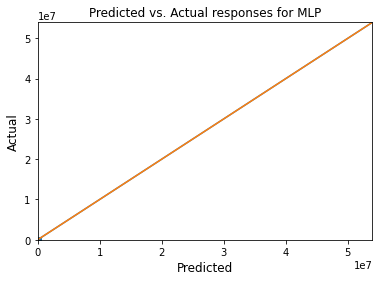

In [7]:
plotfig(NN_model.predict(X_train.astype('float16')), y_train.astype('float16'), 'Predicted vs. Actual responses for MLP', max(y_train) + 0.1*max(y_train))

In [ ]:
#Creating the test data 
testing_data = []
new_array = []

def create_testing_data():
    try:
        counter = 1
        for file in os.listdir(TESTDIR):
            file_path = os.path.join(TESTDIR, file)
            with open(file_path) as csvfile:
                #reader = csv.DictReader(csvfile)
                #reader = csv.reader(csvfile)
                reader = pd.read_csv(csvfile).replace([np.inf, -np.inf, np.nan], 0).values
                #print(reader)
                testing_data.append(reader.astype('float16'))
#                 next(reader)
#                 for line in reader:
#                     new_array.append(line)
                counter += 1
#                 training_data.append(new_array)  # add this to our training_data
            print("Total files: " + str(counter))
            if counter > 4520: #If running locally then consider only 2000 else set the counter value to 4520
                break
    except Exception as e:
        print(e)

create_testing_data()
print(len(testing_data))

In [ ]:
X_test=[]

X_test=np.array(testing_data)#.reshape(len(training_data), 60001, 10, 1)
print(X_test.shape)

In [ ]:
n_input = X_test.shape[1] * X_test.shape[2]
X_test = X_test.reshape((X_test.shape[0], n_input))
X_test.shape

In [ ]:
#Importing the test data 
import pickle

pickle_out = open("X_test_Raw1.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

In [ ]:
predictions = NN_model.predict(X_test)
print(predictions)

In [ ]:
#creating the submission file to kaggle
submission = pd.DataFrame()
submission['segment_id'] = X_test.index
submission['time_to_eruption'] = predictions
submission.to_csv('submission_MLP1_121320.csv', header=True, index=False)